<a href="https://www.kaggle.com/code/tylercortez/assessment-1-linearregression-video-game-sales?scriptVersionId=274714629" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Linear Regression

## 1st Step: Impoting libraries


In [1]:
#Adding all the libraries we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2nd Step: Adding a global visual style

In [2]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

## 3rd Step: Loading the dataset

In [3]:
#Loading the dataset
data = pd.read_csv("/kaggle/input/video-game-sales/vgsales.csv")

#Showing some rows
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 4th Step: Checking the data

In [4]:
#Checking the dataset shape and the missing values
print("Dataset shape:", data.shape)
print("\nMissing values in each columns:\n", data.isnull().sum())

#Quick check at data types
data.info()

Dataset shape: (16598, 11)

Missing values in each columns:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4

## 5th Step: Cleaning the data

In [5]:
#Removing rows that are missing values
data = data.dropna()
#Keeping the only useful columns
data = data[["Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]

## 6th Step: Choosing  the feature and target

In [6]:
#Defining the input features and the target variable
X = data[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

In [7]:

data = data.dropna()

data.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006.0,41.49,29.02,3.77,8.46,82.74
1,1985.0,29.08,3.58,6.81,0.77,40.24
2,2008.0,15.85,12.88,3.79,3.31,35.82
3,2009.0,15.75,11.01,3.28,2.96,33.00
4,1996.0,11.27,8.89,10.22,1.00,31.37


In [8]:
data.columns

Index(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

## 7th Step: Spliting up the data into training and testing

In [9]:
#Spliting the dataset into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 8th Step: Training the model 

In [10]:
#Training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 9th Step: Making the predictions

In [11]:
#Using the model from earlier to make predictions
predictions = model.predict(X_test)

## 10th Step: Evaluating the model

In [12]:
#We calculate the evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.6f}")
print(f"R² Score: {r2:.6f}")

Mean Squared Error: 0.000029
R² Score: 0.999993


## 11th Step: Visualizing the data

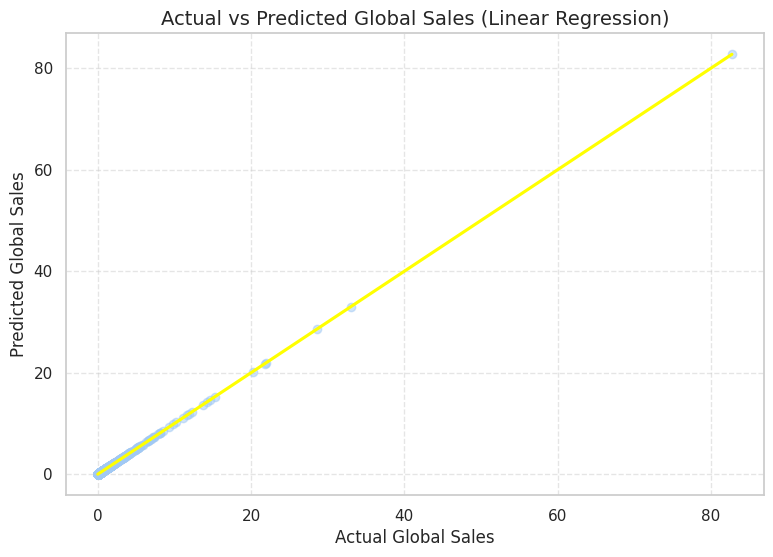

In [13]:
#Create a scatter plot of actual vs predicted sales
plt.figure(figsize=(9, 6))
sns.regplot(x=y_test, y=predictions, scatter_kws={"alpha":0.5}, line_kws={"color":"yellow"})
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs Predicted Global Sales (Linear Regression)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

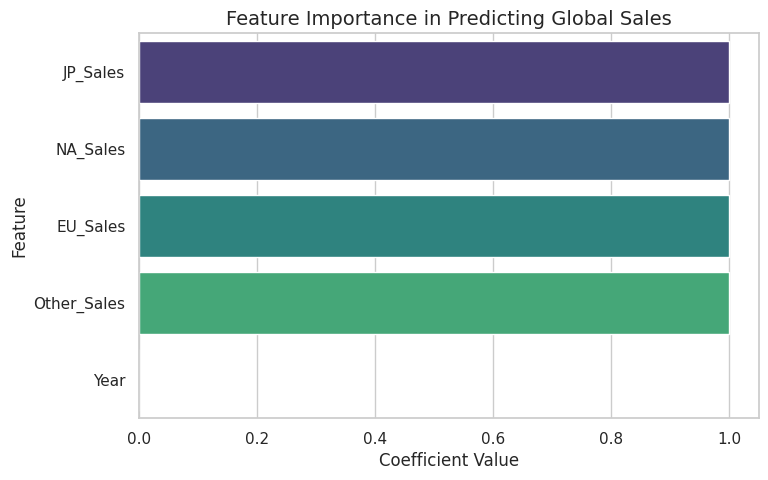

In [14]:
#visualize feature importance
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

sns.barplot(data=coefficients, x="Coefficient", y="Feature", palette="viridis")
plt.title("Feature Importance in Predicting Global Sales")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

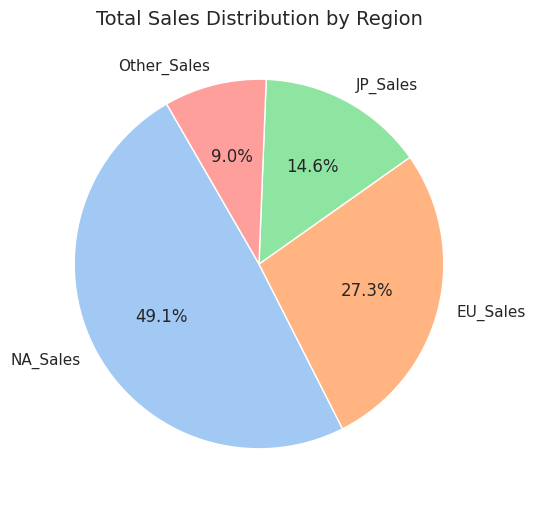

In [15]:
#pie chart to show total sales distribution by each region
region_sales = data[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()

plt.figure(figsize=(6,6))
plt.pie(region_sales, labels=region_sales.index, autopct="%1.1f%%", startangle=120, colors=sns.color_palette("pastel"))
plt.title("Total Sales Distribution by Region")
plt.show()

In [16]:
#A few comparison of actual and prediction
comparison = pd.DataFrame({
    "Actual Global Sales": y_test.values[:10],
    "Predicted Global Sales": predictions[:10]
})

comparison

,Actual Global Sales,Predicted Global Sales
0,0.57,0.570268
1,0.07,0.060290
2,0.19,0.190303
3,0.67,0.670217
4,0.22,0.220344
5,0.11,0.110319
6,0.17,0.170296
7,0.13,0.130325
8,0.02,0.020338
9,0.21,0.210330


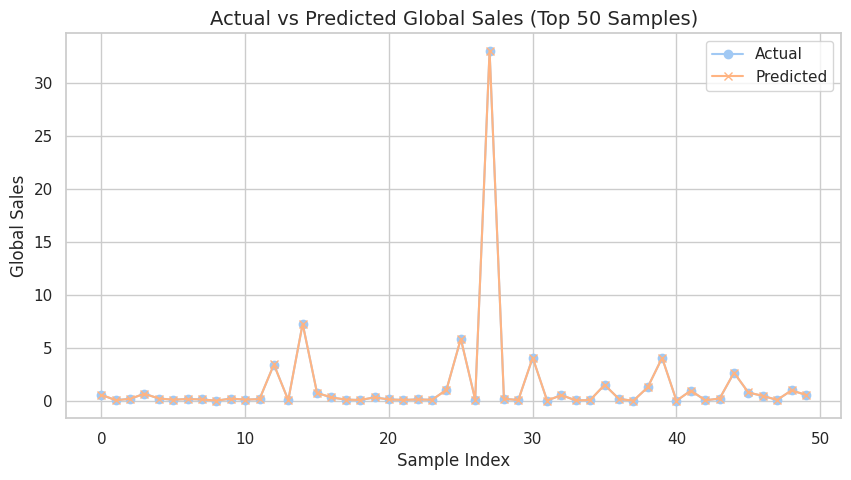

In [17]:
#This is one for a cleaner line chart of actual and prediction
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label="Actual", marker='o')
plt.plot(predictions[:50], label="Predicted", marker='x')
plt.title("Actual vs Predicted Global Sales (Top 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Global Sales")
plt.legend()
plt.grid(True)
plt.show()

## 12th Step: Reflection

For this first part of my experiment i match my model to Linear Regression to make my model predict the sales of video games around the world. My objective was to see how video games in different regions influence the sales around the world. I used a dataset that are filled with datas consist of video game sales around the world from Kaggle like year of release, platform, and regional sales. 

The first thing I did before i trained my model was to clean my dataset by taking off all the missing values and choosing numeric columns. After that I separated the data into two testing and training to check the performance. Then I train this model, I checked how accurate the MSE and r2 score. The r2 of this model showed a high score close to 1.0. And it showed that this model can predict the global sales around the world perfectly. 

When I saw the result I thought my model was excellent until I checked it further, I discovered that discovered that global sales are the sum of all regional sales that made the prediction easier. Meaning my model was learning mathematical relationship than discovering new perceptions. This discovery helped me to see and understand how different model that learns real patterns and the one that fits obvious data. 

I also added visualizations to make it easier and clear to see for example scatter plots for predicted sales, actual sales, and a bar chart that shows what regions has the most influence. All these visuals helped this experiment to look professional and easier to explain and see.

In summary, This model helped me learn how to train, test, end evaluate a linear regression model correctly. I also learned how Linear Regression predict trends in datas and how to intrepet metrics like MSE and r2. The main thing for this conclusion is that this model accuracy should be look at very seriously, sometimes perfect number or score doesn't mean the model is perfect. If I redo this experiment, I would try using a different target or data, like about sales in a specific region, to make this experiment more challenging and realistc 